# 6.6: Sourcing & Analyzing Time Series Data

### 1. Install Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'XPMEgu585Px8e_xsAQjz'

### 2. Import Data Set

In [4]:
# Define path

path = r'/Users/lucerovargas/Documents/Data Analysis/Data Immersion/Achievement 6- Sourcing Open Data'

In [5]:
# Import cleaned data set 

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Data_clean2.csv'), index_col = False)

In [6]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_characteristics,location_description,n_guns_involved,notes,participant_age,participant_gender,participant_relationship,participant_status,participant_type,sources
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,1.0,Julian Sims under investigation: Four Shot and...,0::20,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,1.0,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,1.0,NaN,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.shape

(142390, 19)

### 3. Make a subset of your data if necessary

In [9]:
# Grouping the data set per the 'date' column

df_2 = df.groupby('date').count()

In [10]:
df_2 = df_2.reset_index()

In [11]:
df_2

,date,incident_id,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_characteristics,location_description,n_guns_involved,notes,participant_age,participant_gender,participant_relationship,participant_status,participant_type,sources
0,2013-01-01,3,3,3,3,3,3,3,3,3,1,3,2,3,3,0,3,3,3
1,2013-01-05,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1
2,2013-01-07,2,2,2,2,2,2,2,2,2,1,2,1,2,2,1,2,2,2
3,2013-01-19,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1
4,2013-01-21,2,2,2,2,2,2,2,2,2,0,2,2,0,2,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2018-03-27,68,68,68,65,68,68,68,68,68,7,68,41,43,61,5,68,68,68
1721,2018-03-28,93,93,93,89,93,93,93,93,93,21,93,57,66,86,8,93,93,93
1722,2018-03-29,78,78,78,75,78,78,78,78,78,19,78,48,56,75,9,78,78,78
1723,2018-03-30,76,76,76,75,76,76,76,76,76,20,76,44,50,70,8,76,76,76


In [37]:
# Creating a subset of 'date' and incident_id. This is due to my analysis I would only like to know how many accidents 

# This is due to my analysis I would only like to know how many accidents happened per each date 

df_new = df_2[['date', 'incident_id']]

In [38]:
df_new.head()

,date,incident_id
0,2013-01-01,3
1,2013-01-05,1
2,2013-01-07,2
3,2013-01-19,1
4,2013-01-21,2


In [39]:
# Renaming columnd 'incident_id' to 'incidents per day'

df_new.rename(columns = {'incident_id' : 'incidents_per_day'}, inplace = True)

In [40]:
# Removing any data from 2013 as their is missing data

df_new = df_new.loc[(df_new['date'] >= '2014-01-01')]

In [41]:
 # Set the "date" column as the index

from datetime import datetime

df_new['new_date'] = df_new.date.astype('str')
df_new['new_date'] = pd.to_datetime(df_new['new_date'])
df_new['Year'] = df_new['new_date'].dt.strftime('%Y')
df_new['month'] = pd.DatetimeIndex(df_new['new_date']).month

In [42]:
df_new['Year'] = df_new.Year.astype('str') + '-' + df_new.month.astype('str') + '-01'
df_new['Year'] = pd.to_datetime(df_new['Year'])
df_new = df_new[['Year', 'incidents_per_day']]
df_new.head()

,Year,incidents_per_day
177,2014-01-01,139
178,2014-01-01,69
179,2014-01-01,77
180,2014-01-01,88
181,2014-01-01,77


In [43]:
#then I will need to group all values together

df_new = df_new.groupby('Year').sum()
df_new = df_new.reset_index()
df_new.head()

,Year,incidents_per_day
0,2014-01-01,2378
1,2014-02-01,1611
2,2014-03-01,2005
3,2014-04-01,2175
4,2014-05-01,2529


In [44]:
# Set the "Year" column as the index

from datetime import datetime

df_new['datetime'] = pd.to_datetime(df_new['Year']) # Create a datetime column from "Year.""
df_new = df_new.set_index('datetime') # Set the datetime as the index of the dataframe.
df_new.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
df_new.head()

,incidents_per_day
datetime,
2014-01-01,2378
2014-02-01,1611
2014-03-01,2005
2014-04-01,2175
2014-05-01,2529


In [45]:
# Check for missing values

df_new.isnull().sum()

incidents_per_day    0
dtype: int64

### 4. Create a line chart of your data

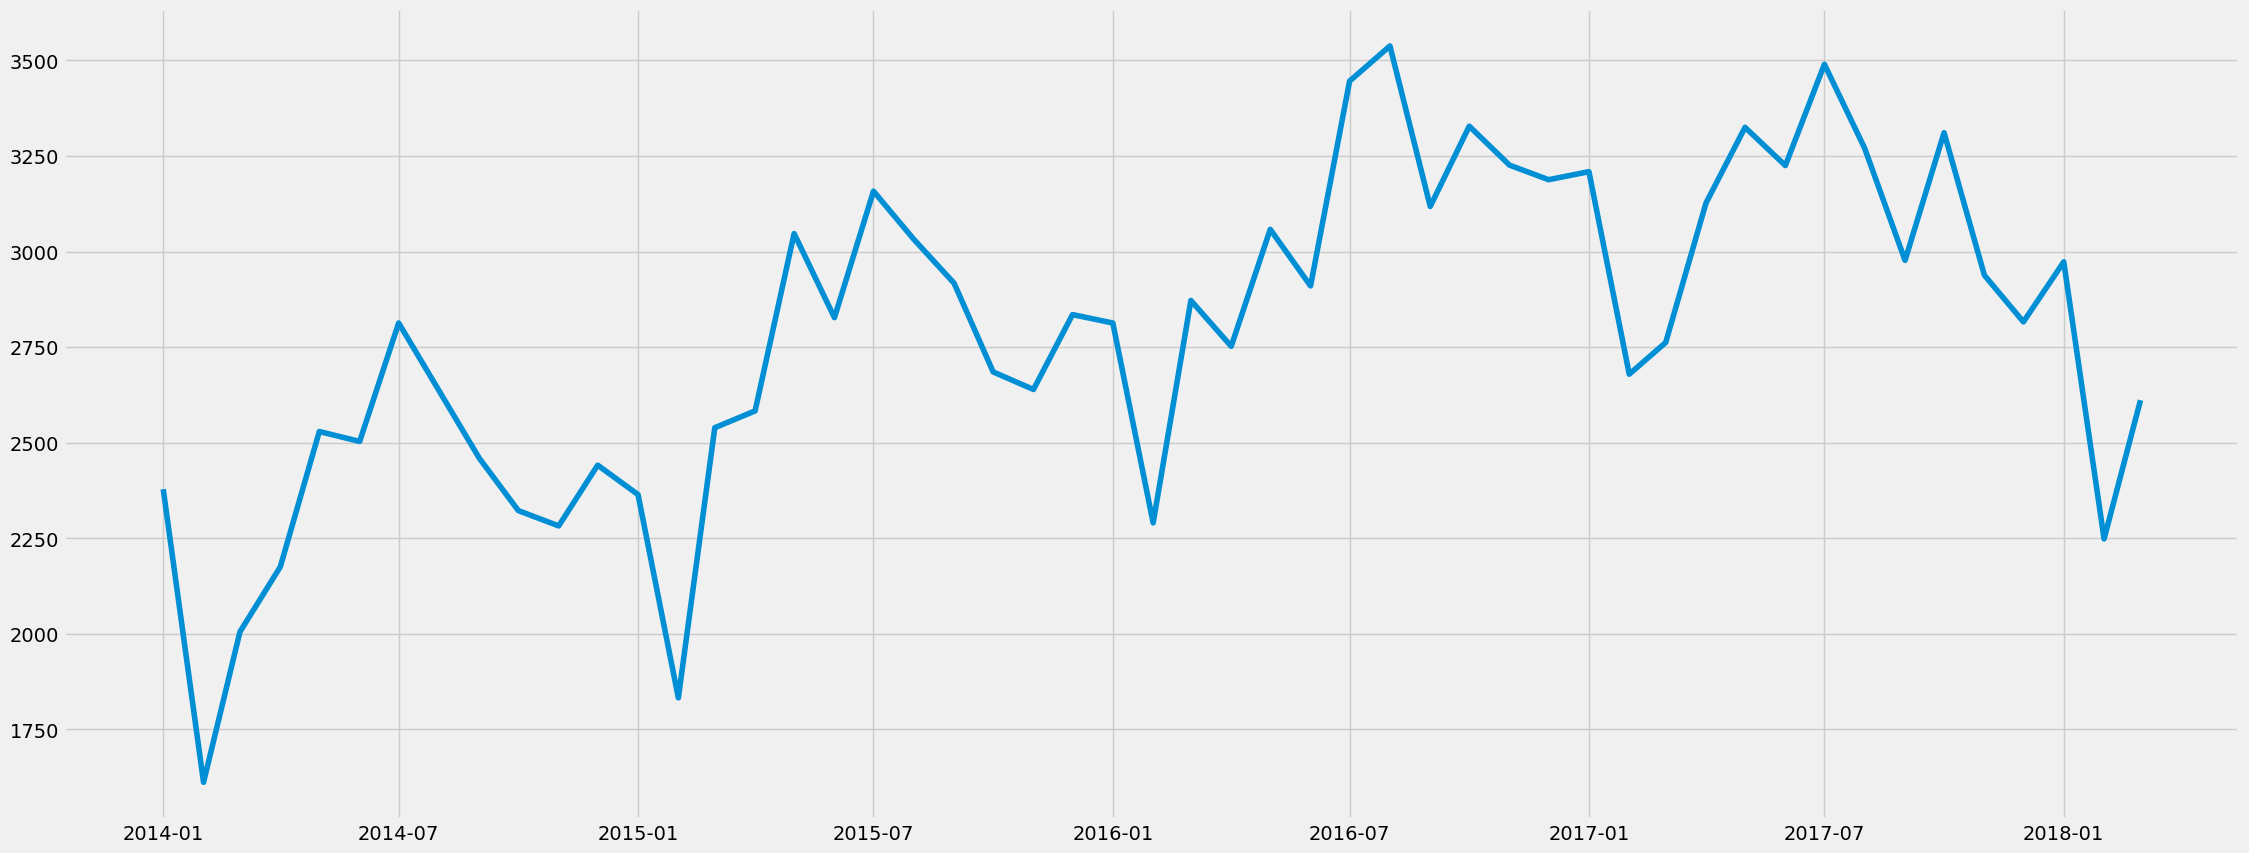

In [51]:
# Plot the new data set

plt.figure(figsize=(25,10), dpi=100)
plt.plot(df_new)

### 5. Decompose the data's components

In [52]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_new, model='additive')

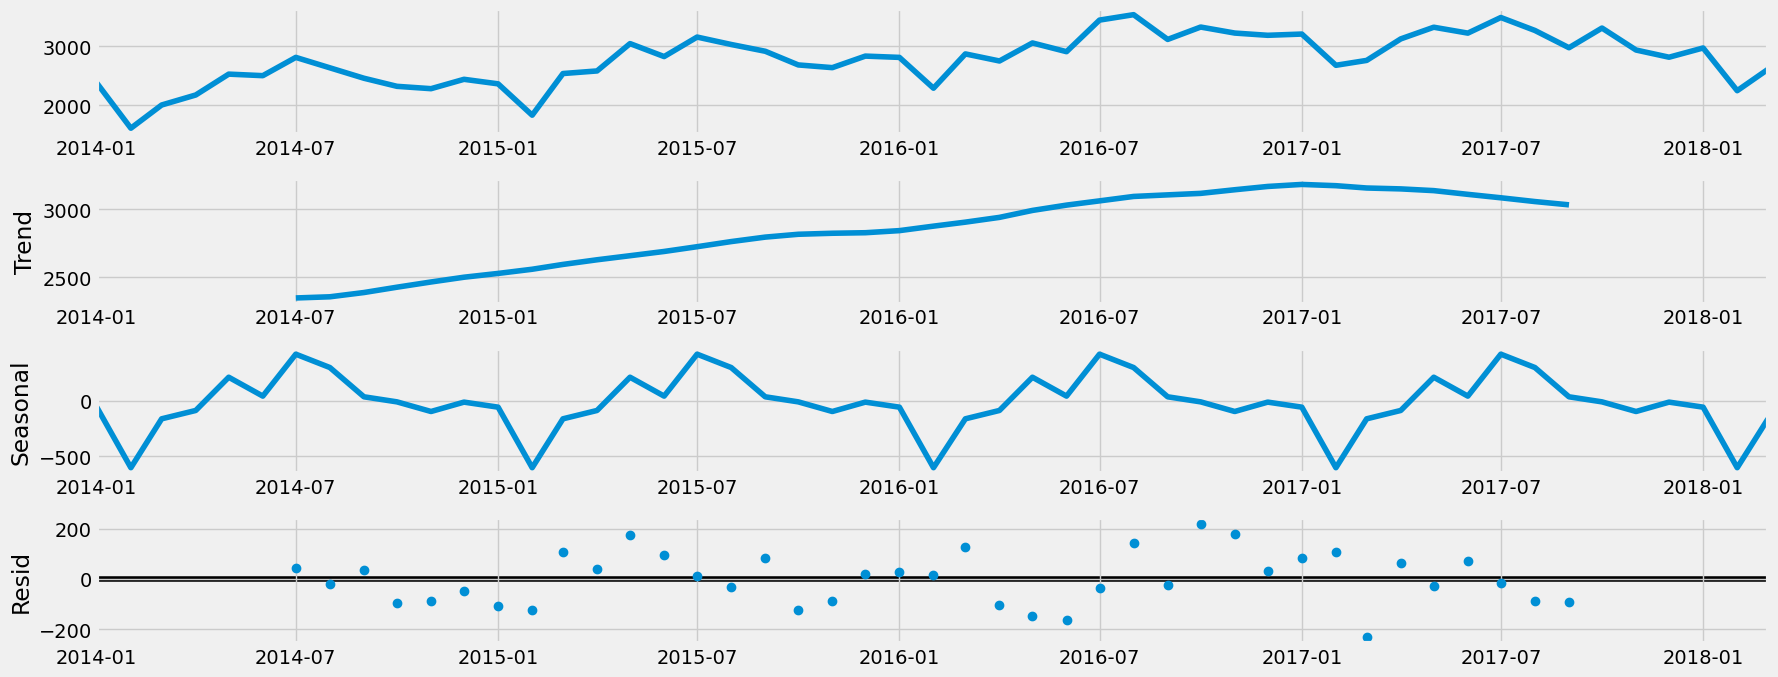

In [53]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7
decomposition.plot()
plt.show()

From the decomposition of the chart I can see that there is a gradually increase in the trend line. As the graph has both a Trend and Seasonality presence I can confidently confirm that this is a non-stationary time series.

### 6. Conduct a Dickey-Fuller test to check for stationarity

In [57]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_new['incidents_per_day'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.421567
p-value                         0.135742
Number of Lags Used            11.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


Conducting the Dickey-Fuller test I can confirm that the data is non-stationary. I reject my null hypothesis which is "Gun violence is decreasing per year" as the Test Statistic of -2.42 is a smaller value than the critical values. The test result is also significant as my p-value is 0.14 and less than 0.5.

### 7. If the data is not stationary, conduct a round of differencing on it and repeat step 6.

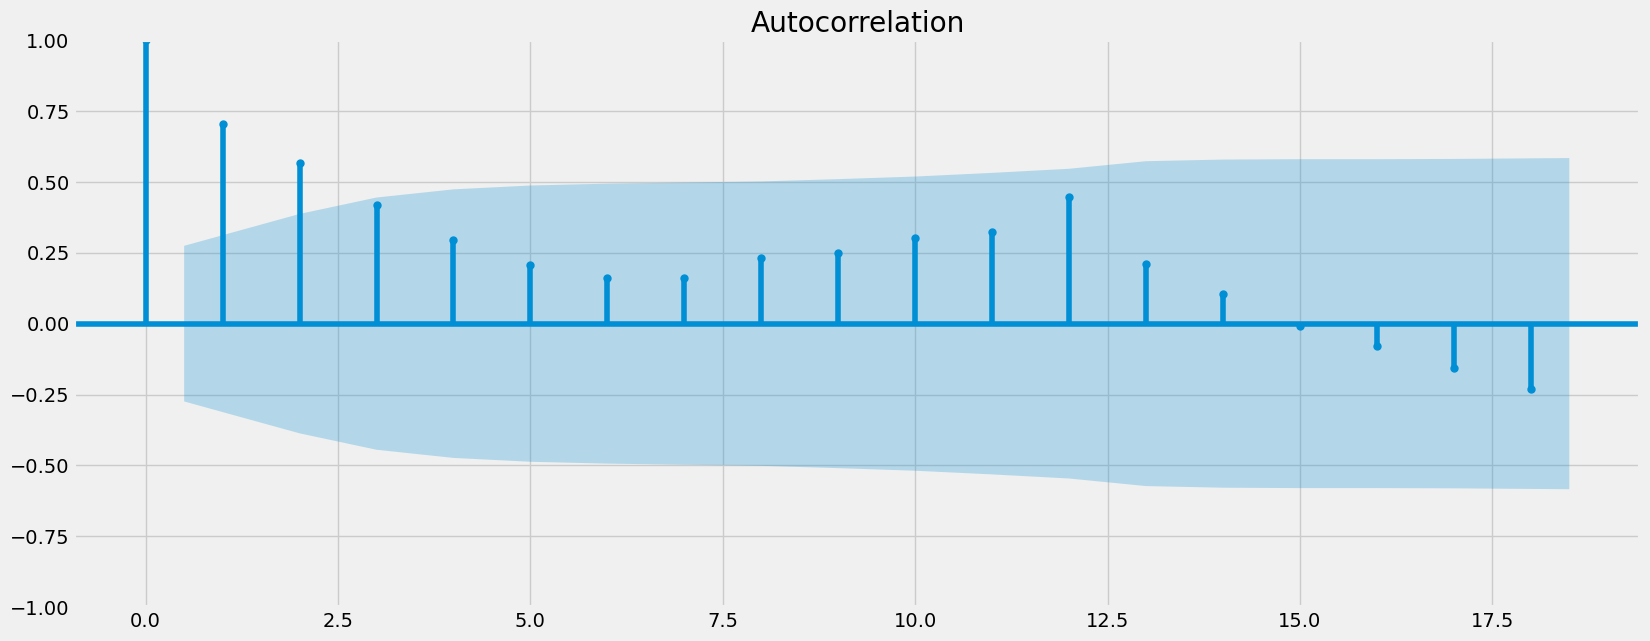

In [59]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_new)
plt.show()

In [60]:
data_diff = df_new - df_new.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [61]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [62]:
data_diff.head()

,incidents_per_day
datetime,
2014-02-01,-767.0
2014-03-01,394.0
2014-04-01,170.0
2014-05-01,354.0
2014-06-01,-26.0


In [63]:
data_diff.columns

Index(['incidents_per_day'], dtype='object')

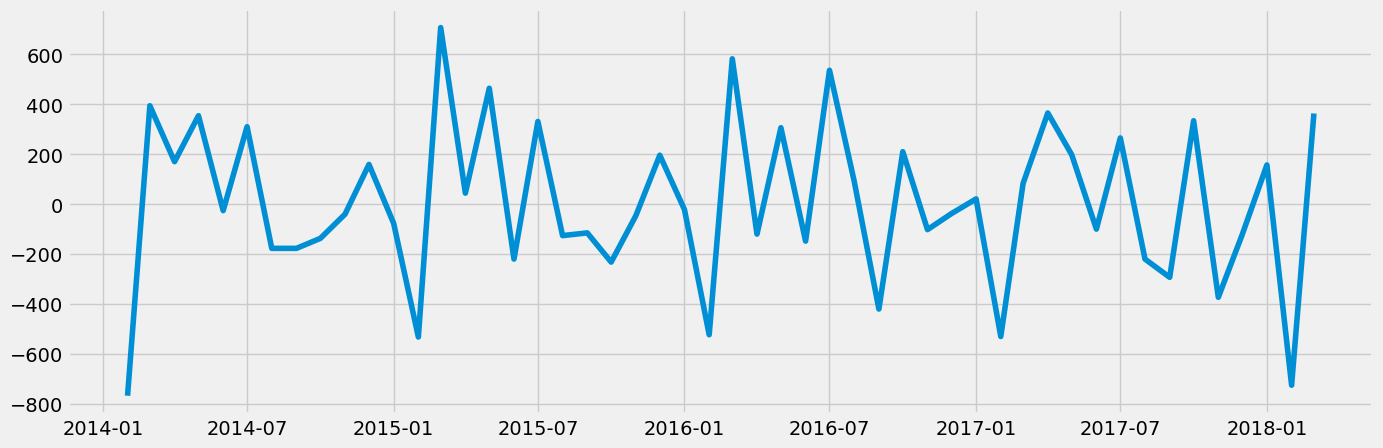

In [64]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [65]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.192167
p-value                         0.676956
Number of Lags Used            11.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


The data set appears to be more non-stationary now. This is because the test statistic went from -2.42 to -1.19. The test statistic is still larger than the critical values. The test result is no longer significat as it is now higher than 0.5

### 8. If the data still is not stationary, perform anotehr round of differencing and repeat step 6.

In [71]:
data_diff2 = data_diff - data_diff.shift(1) 

In [72]:
data_diff2.dropna(inplace = True)

In [73]:
data_diff2.head()

,incidents_per_day
datetime,
2014-03-01,1161.0
2014-04-01,-224.0
2014-05-01,184.0
2014-06-01,-380.0
2014-07-01,336.0


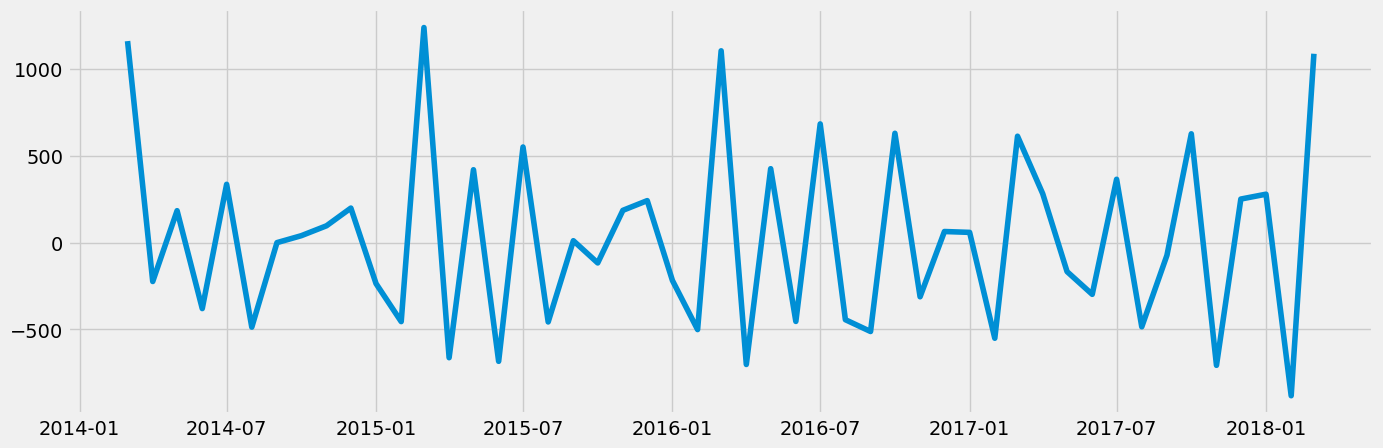

In [76]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [77]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.747534e+00
p-value                        1.022479e-11
Number of Lags Used            1.000000e+01
Number of Observations Used    3.800000e+01
Critical Value (1%)           -3.615509e+00
Critical Value (5%)           -2.941262e+00
Critical Value (10%)          -2.609200e+00
dtype: float64


The data set is now stationary, the test statistic is smaller than all critical values. The p-value has increased to 1.0

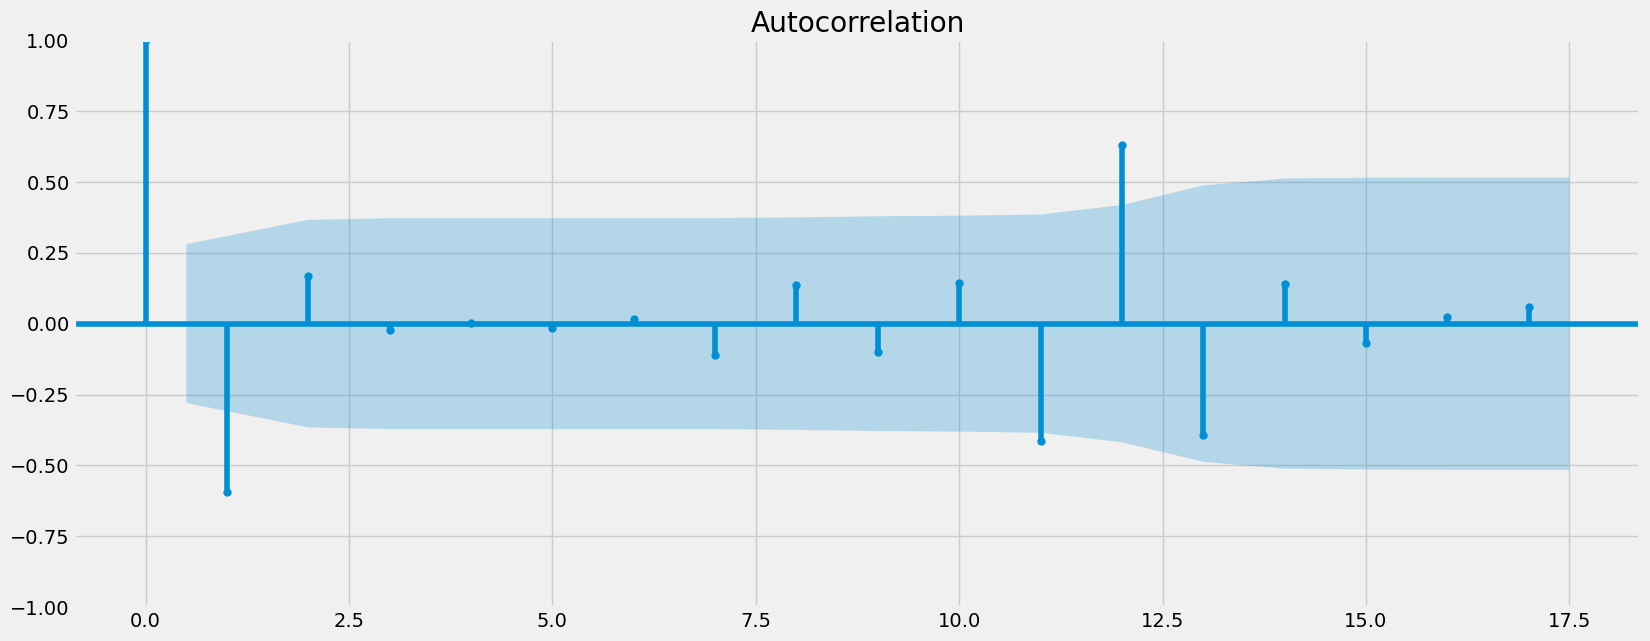

In [78]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff2)
plt.show()